In [1]:
import matplotlib.pyplot as plt
import numpy as np
from muca.model.p_body_ising import PBodyTwoDimIsing
from muca.algorithm.wang_landau import WangLandau
from muca.algorithm.parameters import WangLandauParameters
from muca.results.analysis import Analyzer

In [2]:
p = 3
L = 6
S = 0.5
model = PBodyTwoDimIsing(J=-1, p=p, Lx=L, Ly=L, spin=S, spin_scale_factor=1/S)
parameters = WangLandauParameters(
    modification_criterion=1e-08,
    convergence_check_interval=100,
    num_divided_energy_range=1,
    overlap_rate = 0.4,
    flatness_criterion = 0.9,
)

In [3]:
result = WangLandau.run(
    model=model,
    parameters=parameters,
    num_threads=1,
    calculate_order_parameters=True,
    backend = "cpp"
)


Running Wang-Landau simulation by cpp ...
Done simulation (0.7) [sec] by cpp


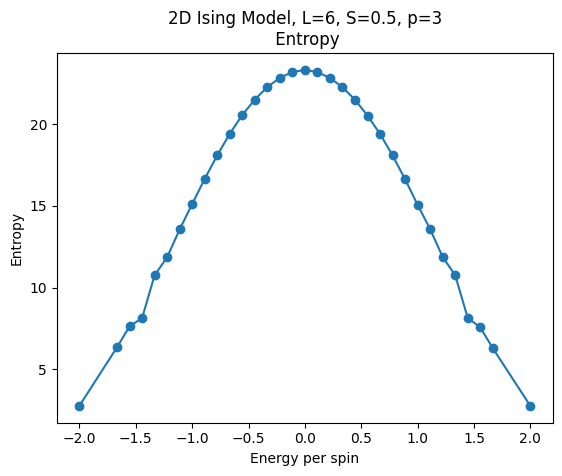

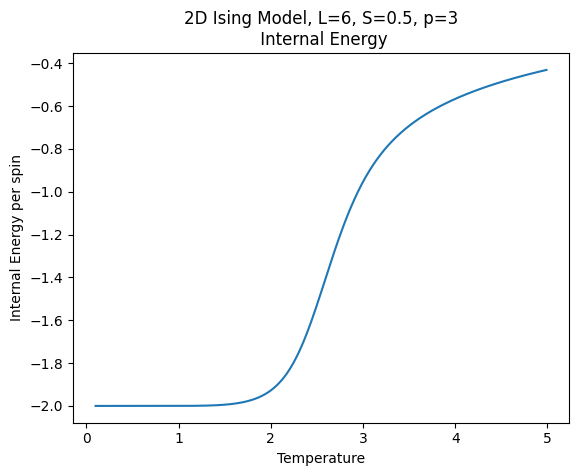

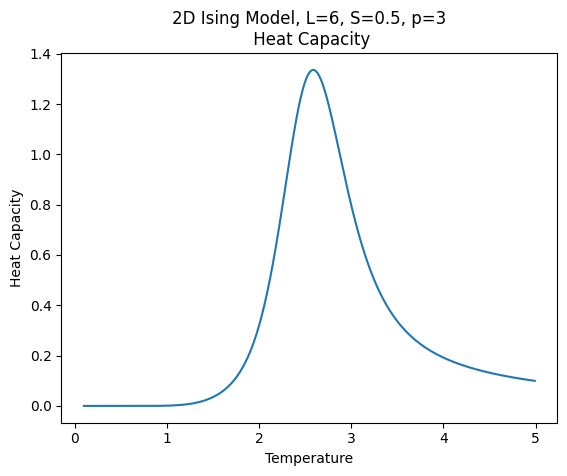

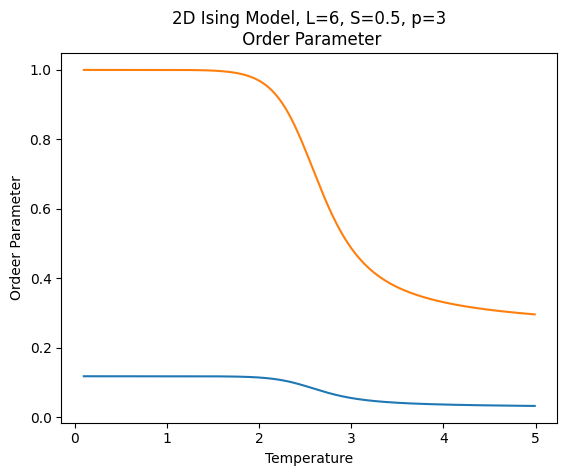

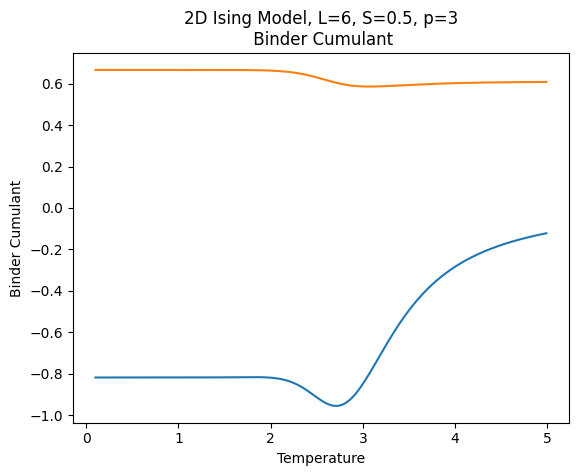

In [4]:
N = result.model.Lx*result.model.Ly
plt.title(f"2D Ising Model, L={L}, S={S}, p={p}\n Entropy")
plt.plot(result.energies/N, result.entropies, marker="o")
plt.xlabel("Energy per spin")
plt.ylabel("Entropy")
plt.show()

temperature = np.arange(0.1, 5, 0.01)
plt.title(f"2D Ising Model, L={L}, S={S}, p={p}\n Internal Energy")
u = Analyzer.calculate_energy_expectation(result.energies, result.entropies, temperature)/N
plt.plot(temperature, u)
plt.xlabel("Temperature")
plt.ylabel("Internal Energy per spin")
plt.show()

plt.title(f"2D Ising Model, L={L}, S={S}, p={p}\n Heat Capacity")
c = Analyzer.calculate_heat_capacity(result.energies, result.entropies, temperature)/N
plt.plot(temperature, c)
plt.xlabel("Temperature")
plt.ylabel("Heat Capacity")
plt.show()

plt.title(f"2D Ising Model, L={L}, S={S}, p={p}\n Order Parameter")
o = Analyzer.calculate_expectation(result.energies, result.entropies, temperature, result.order_parameters.squared_magnetization)
plt.plot(temperature, o)
o = Analyzer.calculate_expectation(result.energies, result.entropies, temperature, result.order_parameters.abs_fourier_second)
plt.plot(temperature, o)
plt.xlabel("Temperature")
plt.ylabel("Ordeer Parameter")
plt.show()

plt.title(f"2D Ising Model, L={L}, S={S}, p={p}\n Binder Cumulant")
mm = Analyzer.calculate_expectation(result.energies, result.entropies, temperature, result.order_parameters.squared_magnetization)
mmmm = Analyzer.calculate_expectation(result.energies, result.entropies, temperature, result.order_parameters.forth_magnetization)
oo = Analyzer.calculate_expectation(result.energies, result.entropies, temperature, result.order_parameters.abs_fourier_second)
oooo = Analyzer.calculate_expectation(result.energies, result.entropies, temperature, result.order_parameters.abs_fourier_fourth)
plt.plot(temperature, 1 - mmmm / (3 * mm**2))
plt.plot(temperature, 1 - oooo / (3 * oo**2))
plt.xlabel("Temperature")
plt.ylabel("Binder Cumulant")
plt.show()